El método de Euler está dado por $y_{n+1}=y_n+h\ f(x_n,y_n)$. Recordamos que para resolver la ecuación diferencia se requiere realizar la siguiente integración $\int_{x_n}^{x_{n+1}}y'(x)=\int_{x_n}^{x_{n+1}}f(x,y)dx$, donde se integra de manera recursiva la función de $f$, avanzando del intervalo $[x_n,x_{n+1}]$ al intervalo $[x_n,x_{n+1}]$. Al integrar el lado izquierdo se obtiene que $y(x_{n+1})=y_{n+1}=y_n+\int_{x_n}^{x_{n+1}}f(x,y)dx$. 

Para aumentar el orden del método se puede considerar $f(x,y)=f(x_n,y_n)+f'(x_n,y_n)h$ donde $\frac{d}{dx}f(x,y)=\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial x} = \frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}f = (\nabla{f})\cdot(1,f)$. Con esto, se puede integrar la ecuación diferencial al calcular de manera iterada $y_{n+1}=y_n+h\ f(x_n,y_n)+\frac{h^2}{2}(\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}f)\Big|_{x_n,y_n}$

Del mismo modo para considerar un orden mayor se calcula la segunda derivada mediante $\frac{d^2}{dx^2}f(x,y)=\frac{d}{dx}(\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}f)=\underbrace{ \frac{\partial^2 f}{\partial x^2}+\frac{\partial ^2 f}{\partial x \partial y}f+(\frac{\partial^2 f}{\partial x \partial y}+\frac{\partial^2 f}{\partial y^2}f)f}_\text{Matriz Hessiana} +(\underbrace{\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}f}_\text{$\nabla f \cdot (1, f)$})^2$.


Esta forma de hacer los cálculos complica el método pues se utilizan derivadas de orden superior y aparecen el Gradiente y la matriz Hessiana sólo con tomar orden dos. Por esta razón se puede utilizar en segundo orden el método de Runge Kutta.

Primero resolveremos una ecuación diferencial de la forma $x´=f(x,t)$ utilizando ambos métodos para comparar su efectividad. En particular consideraremos $x'=-tx$, con condición inicial $x_0=x(t=0)=1$, la cual tiene como solución $e^{-t^2}$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def ecdif(x,t):
    return -t*x

In [14]:
def euler (funcion,x0,t0,tf,h=0.01):
    tiempos=np.arange(t0,tf,h)
    x=np.zeros(len(tiempos))
    x[0]=x0
    for i in range(0,len(tiempos)-1):
        x[i+1]=x[i]+h*funcion(x[i],tiempos[i])
    solucion=[tiempos,x]    
    return solucion

Para el segundo método calcularemos las derivadas parciales de $x'=f(x,t)$ respecto de x y de t. Se tiene que $\partial_{x}f=-t$ y $\partial_{t}f=-x$.

In [15]:
def dert(x,t):
    return -x

def derx(x,t):
    return -t

In [16]:
def orden2 (funcion,dert,derx,x0,t0,tf,h=0.01):
    tiempos=np.arange(t0,tf,h)
    x=np.zeros(len(tiempos))
    x[0]=x0
    for i in range(0,len(tiempos)-1):
        x[i+1]=x[i]+h*funcion(x[i],tiempos[i])+(0.5*h**2)*(dert(x[i],tiempos[i])+funcion(x[i],tiempos[i])*derx(x[i],tiempos[i]))
    solucion=[tiempos,x]    
    return solucion

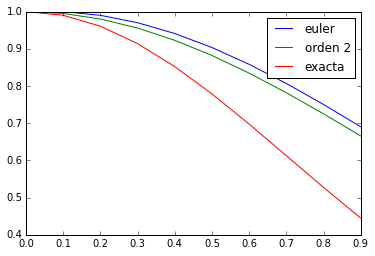

In [38]:
sol1=euler(ecdif,1,0,1,.1)
sol2=orden2(ecdif,dert,derx,1,0,1,.1)
plt.plot(sol1[0],sol1[1],label="euler")
plt.plot(sol2[0],sol2[1],label="orden 2")
plt.plot(sol2[0],np.exp(-sol1[0]**2),label="exacta")
plt.legend()